**Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

Data processing and collection

In [ ]:
# loading the data into pandas dataframe
car_dataset = pd.read_csv('/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# getting some infomation about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values in the dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the categorical data

In [ ]:
# encoding the Fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# encoding the Seller_Type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# encoding the Transmission column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### **Splitting the data and target into training and test data**

In [ ]:
x = car_dataset.drop(['Selling_Price', 'Car_Name'], axis=1)
y = car_dataset['Selling_Price']

In [ ]:
print(x, y, sep='\n\n')

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)


## **MODEL TRAINING**



## 1.   **Linear Regression**




In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model evaluation

In [ ]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
# R squared
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8799451660493711


Visualize actual price and predicted price

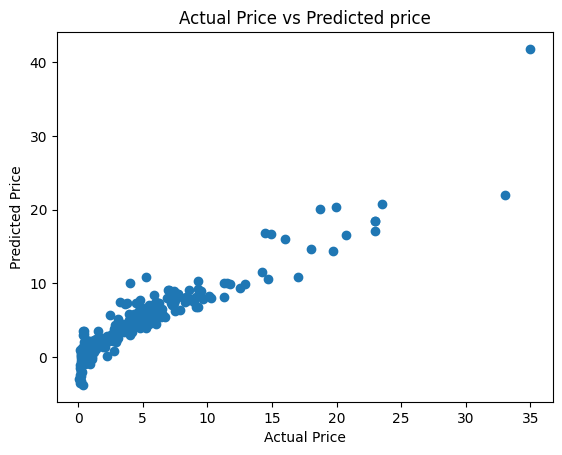

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted price")
plt.show()

In [ ]:
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
# R squared
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8365766715027051


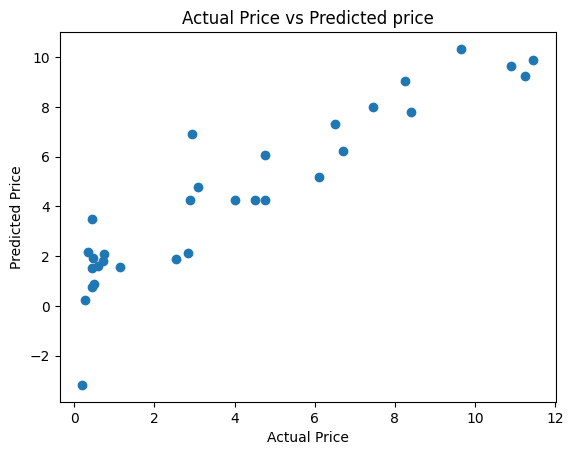

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted price")
plt.show()



## 2.   **Lasso regression**



In [ ]:
# loading the Lasso regression model
las_reg_model = Lasso()

In [ ]:
las_reg_model.fit(x_train, y_train)

Lasso()

Model evaluation

In [ ]:
# prediction on training data
training_data_prediction = las_reg_model.predict(x_train)

In [ ]:
# R squared
error_score = metrics.r2_score(y_train, training_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8427856123435794


Visualize actual price and predicted price

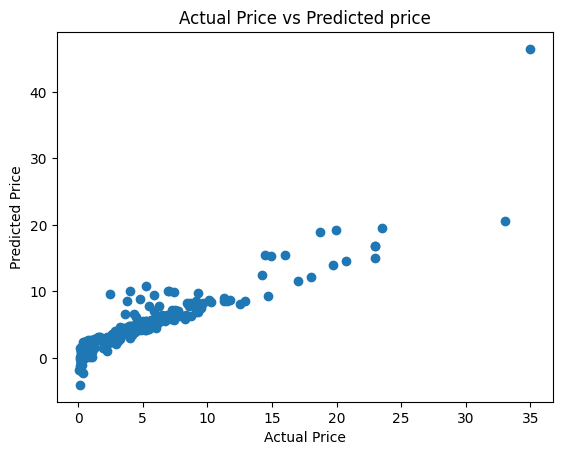

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted price")
plt.show()

In [ ]:
test_data_prediction = las_reg_model.predict(x_test)

In [ ]:
# R squared
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8709167941173195


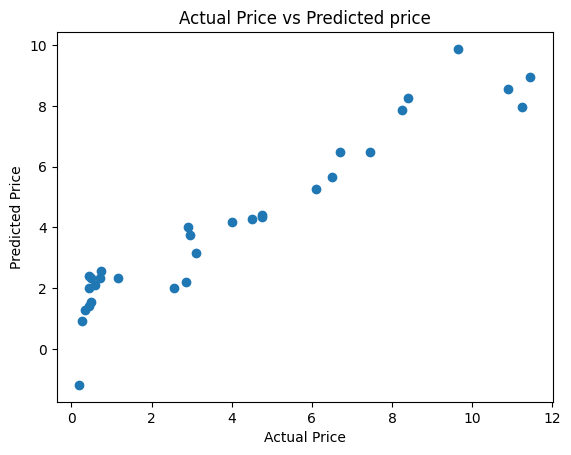

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted price")
plt.show()